# KNN classification model on classified data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Classified Data',index_col=0)

In [3]:
df.head()
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler=StandardScaler()


In [6]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))


In [7]:
df_new=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_new.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x=df_new
y=df['TARGET CLASS']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn=KNeighborsClassifier(n_neighbors=1)

In [12]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
pred=knn.predict(x_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [27]:
error_rate= []

for i in range(1,40):
    
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i !=y_test))
    
print(error_rate)

[0.07666666666666666, 0.09, 0.05, 0.07, 0.056666666666666664, 0.05, 0.06666666666666667, 0.06, 0.05, 0.056666666666666664, 0.05333333333333334, 0.04666666666666667, 0.05, 0.056666666666666664, 0.056666666666666664, 0.05, 0.05, 0.04666666666666667, 0.05, 0.05333333333333334, 0.05, 0.05, 0.06333333333333334, 0.056666666666666664, 0.056666666666666664, 0.05, 0.05, 0.04666666666666667, 0.06, 0.05, 0.056666666666666664, 0.04666666666666667, 0.05333333333333334, 0.043333333333333335, 0.04666666666666667, 0.043333333333333335, 0.04666666666666667, 0.043333333333333335, 0.05]


Text(0, 0.5, 'error rate')

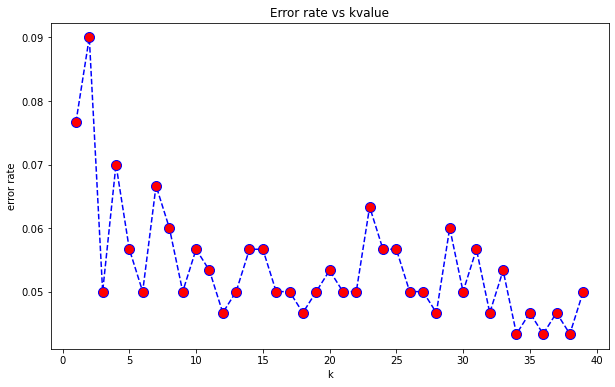

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs kvalue')
plt.xlabel('k')
plt.ylabel('error rate')

In [24]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[153   6]
 [  9 132]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

